In [1]:
from coba.benchmarks import Result
from coba.analysis import Plots
import numpy as np
import pandas as pd

In [15]:
result = Result.from_transaction_log('benchmark_medish.log')

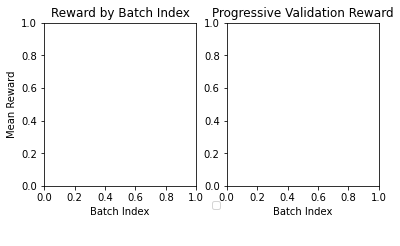

In [16]:
Plots.standard_plot(result, show_err=True)

In [5]:
result

{'Learners': 4, 'Simulations': 7, 'Batches': 31963}

In [17]:
l,s,b = result.to_pandas()
l

,learner_id,family,full_name,e,m,x,bag
0,0,CMT_1,"CMT_1(e=0.1,m=100)",0.1,100.0,NaN,NaN
1,1,CMT_1,"CMT_1(e=0.1,m=500)",0.1,500.0,NaN,NaN
2,2,vw_Fluid_Bagging,"vw_Fluid_Bagging(x=['ssa', 'sa', '-s'],bag=5)",NaN,NaN,"[ssa, sa, -s]",5.0
3,3,UCB,UCB,NaN,NaN,NaN,NaN


In [18]:
mega = b.groupby(['learner_id', 'simulation_id'], as_index=False).mean('reward')
mega

,learner_id,simulation_id,batch_index,N,reward
0,0,0,999.0,1.0,0.329665
1,0,1,999.0,1.0,0.532766
2,0,2,999.0,1.0,0.377689
3,0,4,999.0,1.0,0.475238
4,1,0,999.0,1.0,0.627814
5,1,1,999.0,1.0,0.370185
6,1,2,999.0,1.0,0.442721
7,1,4,999.0,1.0,0.494747
8,2,0,999.0,1.0,0.095048
9,2,1,999.0,1.0,0.690845


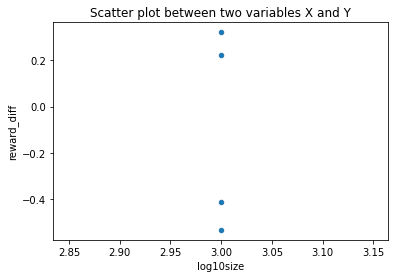

In [19]:
ultra = pd.merge(mega[mega.learner_id == 1], mega[mega.learner_id == 2], on='simulation_id')
ultra['reward_diff'] = ultra.reward_y - ultra.reward_x
ultra['log10size'] = np.log10(ultra['batch_index_x'])
ultra.plot.scatter(x='log10size', y='reward_diff', title= "Scatter plot between two variables X and Y")